<a href="https://colab.research.google.com/github/data602sps/assignments/blob/master/05_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**

# **Weeks 10 & 11 - matplotlib & seaborn**


# Purpose:

* To practice creating various visualizations using the matplotlib and seaborn library

# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

The dataset is from the following link: https://archive.ics.uci.edu/dataset/242/energy+efficiency

I added the raw data to my Git Hub here: https://raw.githubusercontent.com/juliaDataScience-22/cuny-spring-24/main/EnergyEfficiency.csv

This dataset was part of research that assessed the heating and cooling load requirements of buildings. In the study, 768 building shapes were created and simulated to form this dataset. The variables are Relative Compactness, Surface Area, Wall Area, Roof Area, Overall Height, Orientation, Glazing Area, Glazing Area Distribution, Heating Load, and Cooling Load. Heating Load and Cooling load were the dependent variables and all others were independent. The dataset is entirely numerical, so it is useful when learning how to create graphs in python.

The research article can be found here: https://www.semanticscholar.org/paper/Accurate-quantitative-estimation-of-energy-of-using-Tsanas-Xifara/719e65379c5959141180a45f540f707d583b8ce2


______________
# Data Exploration

This following section of code displays some general information about the data set. It also includes information about the mean, median, and quantiles for each variable. None of the values were missing as seen by the last statement of code.

These are the variables and their meanings from the dataset:

Relative Compactness - the ratio of the building's exterior surface area to its enclosed volume, a low number means a large surface area for a small inside volume, a high number means a small surface area for a large inside volume, according to the article all the buildings had a volume of 771.75 m^3

Surface Area - the amount of surface area of the building, this is presumed to be all surfaces of the building but was not specified in the article

Wall Area - the amount of surface area of external surfaces of the building, this is presumed to only include external walls but was not specified in the article

Roof Area - the amount of surface area of only the roof of the building

Overall Height - the overall height of the building

Orientation - the orientation of the building meaning the side that had 55% glazing, 2 = north, 3 = east, 4 = south, 5 = west

Glazing Area - the percentage of the floor glazed

Glazing Area Distribution - the orientation value associated with a specific distribution of glazing area

* 0 = no glazing
* 1 = 25% glazing on each side
* 2 = 55% glazing on the north side, 15% on each other side
* 3 = 55% glazing on the east side, 15% on each other side
* 4 = 55% glazing on the south side, 15% on each other side
* 5 = 55% glazing on the west side, 15% on each other side

Heating Load - the amount of energy needed to heat a building to a comfortable temperature in cold weather

Cooling Load - the amount of energy needed to cool a building to a comfortable temperature in hot weather



In [2]:
import pandas as pd
energyData = pd.read_csv('https://raw.githubusercontent.com/juliaDataScience-22/cuny-spring-24/main/EnergyEfficiency.csv')

print("Information about the table of data:")
print(energyData.info())
print(" ")

print("True or False: The variable contains any missing values:")
print(energyData.isna().any())

data2 = energyData.select_dtypes(include=['number'])

final_data = pd.concat([data2.mean(), data2.median(), data2.quantile([0, 0.25, 0.5, 0.75, 1]).transpose()], axis=1)
final_data.columns = ['Mean', 'Median', 'Minimum', '25%', '50%', '75%', 'Maximum']
print(" ")
print("Overall Summary Statistics:")
print(final_data)

Information about the table of data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB
None
 
True or False: The variable contains any missing values:
Relative Compactness         False
Surface Area                 False
W

# Data Wrangling

**1. Rename columns to make them camelcase.**

Each column will be renamed to camelcase, meaning the first letter of each word is capitalized except the first word. For example, Relative Compactness becomes relativeCompactness. After renaming the columns, information about the data frame is printed to display the new columns names.

In [5]:
energyData.rename(columns = {'Relative Compactness':'relativeCompactness', 'Surface Area':'surfaceArea',
                             'Wall Area':'wallArea', 'Roof Area':'roofArea', 'Overall Height':'overallHeight',
                             'Orientation':'orientation', 'Glazing Area':'glazingArea',
                             'Glazing Area Distribution':'glazingAreaDistribution',
                             'Heating Load':'heatingLoad', 'Cooling Load':'coolingLoad'}, inplace = True)
print(energyData.info())
print(energyData[energyData['glazingAreaDistribution'] > 2])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   relativeCompactness      768 non-null    float64
 1   surfaceArea              768 non-null    float64
 2   wallArea                 768 non-null    float64
 3   roofArea                 768 non-null    float64
 4   overallHeight            768 non-null    float64
 5   orientation              768 non-null    int64  
 6   glazingArea              768 non-null    float64
 7   glazingAreaDistribution  768 non-null    int64  
 8   heatingLoad              768 non-null    float64
 9   coolingLoad              768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB
None
     relativeCompactness  surfaceArea  wallArea  roofArea  overallHeight  \
144                 0.98        514.5     294.0    110.25            7.0   
145                 0.98        514.5  

**2. Create new columns based on existing columns or calculations.**

Two new variables were created for potential analysis in the future. These variables were *Wall Area to Roof Area* and *Average Height by Surface Area*. The first variable was computed by taking the wall area and dividing it by the roof area. The second variable was computed by finding the average overall height for each unique value of surface area. The first 5 rows of the resulting data frame were printed.

In [ ]:
energyData['wallAreaToRoofArea'] = energyData['wallArea'] / energyData['roofArea']
areaHt = energyData.groupby('surfaceArea')['overallHeight'].mean()
energyData['avgHeightBySA'] = energyData['surfaceArea'].map(areaHt)

print(energyData.head())


   relativeCompactness  surfaceArea  wallArea  roofArea  overallHeight  \
0                 0.98        514.5     294.0    110.25            7.0   
1                 0.98        514.5     294.0    110.25            7.0   
2                 0.98        514.5     294.0    110.25            7.0   
3                 0.98        514.5     294.0    110.25            7.0   
4                 0.90        563.5     318.5    122.50            7.0   

   orientation  glazingArea  glazingAreaDistribution  heatingLoad  \
0            2          0.0                        0        15.55   
1            3          0.0                        0        15.55   
2            4          0.0                        0        15.55   
3            5          0.0                        0        15.55   
4            2          0.0                        0        20.84   

   coolingLoad  wallAreaToRoofArea  surfaceAreaToHeight  
0        21.33            2.666667                  7.0  
1        21.33          

**3. Group your dataset by one column, and get the mean, min, and max values by group. Use groupby(), agg(), or .apply().**

The mean, minimum, and maximum values of surface area were found for all groups of heating load and cooling load. I used agg() to find these values. The first five values of heating load and cooling load were printed.


In [ ]:
print(energyData.groupby(['heatingLoad'])[["surfaceArea"]].agg(['mean', 'min', 'max']).head())
print(" ")
print(energyData.groupby(['coolingLoad'])[["surfaceArea"]].agg(['mean', 'min', 'max']).head())

            surfaceArea              
                   mean    min    max
heatingLoad                          
6.01              686.0  686.0  686.0
6.04              686.0  686.0  686.0
6.05              686.0  686.0  686.0
6.07              686.0  686.0  686.0
6.37              710.5  710.5  710.5
 
            surfaceArea              
                   mean    min    max
coolingLoad                          
10.90             686.0  686.0  686.0
10.94             686.0  686.0  686.0
11.17             686.0  686.0  686.0
11.19             686.0  686.0  686.0
11.27             710.5  710.5  710.5


**4. Group your dataset by two columns and then sort aggregated results within the groups.**

Values for heating/cooling load, orientation, and surface area were sorted after finding the sum of surface area for each unique combination of heating load and orientation. They were sorted in ascending order.


In [ ]:
grouped_data = energyData.groupby(['heatingLoad', 'orientation'])['surfaceArea'].sum().reset_index()
sorted_data = grouped_data.sort_values(by=['heatingLoad', 'orientation', 'surfaceArea'])
print(sorted_data.head())

grouped_data = energyData.groupby(['coolingLoad', 'orientation'])['surfaceArea'].sum().reset_index()
sorted_data = grouped_data.sort_values(by=['coolingLoad', 'orientation', 'surfaceArea'])
print(sorted_data.head())

   heatingLoad  orientation  surfaceArea
0         6.01            4        686.0
1         6.04            5        686.0
2         6.05            3        686.0
3         6.07            2        686.0
4         6.37            2        710.5
   coolingLoad  orientation  surfaceArea
0        10.90            2        686.0
1        10.94            4        686.0
2        11.17            5        686.0
3        11.19            3        686.0
4        11.27            2        710.5


**5. Find the number of unique values for each column of the data frame.**

The number of unique values for each column is found with nunique(). Heatind load and cooling load were the only dependent variables, so they had the largest number of unique values. All other categories were independent variables and chosen from the start by the researchers.


In [ ]:
energyData.nunique()

relativeCompactness         12
surfaceArea                 12
wallArea                     7
roofArea                     4
overallHeight                2
orientation                  4
glazingArea                  4
glazingAreaDistribution      6
heatingLoad                586
coolingLoad                636
wallAreaToRoofArea          12
surfaceAreaToHeight          2
dtype: int64

# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties.

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.

#### **Plot 1: Scatter Plot**

In this scatter plot, you can see the heating loads for all relative compactness values. The features included in the graph:

*   Use and change a legend position
*   Change a legend font size
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Change size of axis Labels
*   Your own choice not included above (jitter to show the values more clearly)

The graph shows that lower compactness values tend to have less of a heating load than higher compactness values.

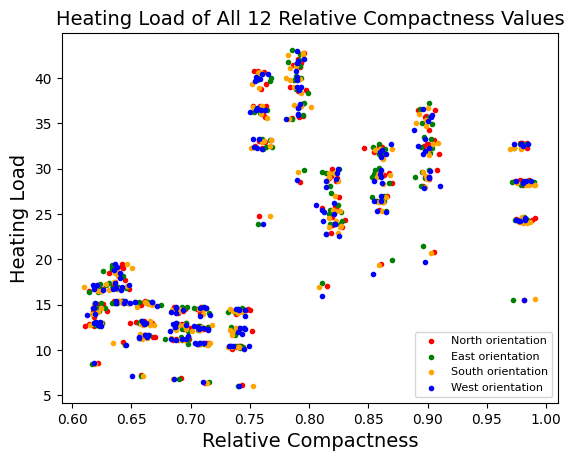

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

unique_orientation = energyData['orientation'].unique()

color_map = {
    2: 'red',   # north
    3: 'green',  # east
    4: 'orange',    # south
    5: 'blue'  # west
}

for num in unique_orientation:
    x = [energyData['relativeCompactness'][i] for i in range(len(energyData['relativeCompactness'])) if energyData['orientation'][i] == num]
    y = [energyData['heatingLoad'][i] for i in range(len(energyData['heatingLoad'])) if energyData['orientation'][i] == num]

    if num == 2:
      newNum = 'North'
    elif num == 3:
      newNum = 'East'
    elif num == 4:
      newNum = 'South'
    elif num == 5:
      newNum = 'West'

    if num in color_map:
        color = color_map[num]
        new_orientation = color
    else:
        color = 'black'
        new_orientation = 'unknown'

    jitter_amount = 0.005
    x_jittered = x + np.random.normal(loc=0, scale=jitter_amount, size=len(x))
    y_jittered = y + np.random.normal(loc=0, scale=jitter_amount, size=len(y))
    plt.scatter(x_jittered, y_jittered, label=f'{newNum} orientation', color = color, marker = '.')

plt.xlabel('Relative Compactness', fontsize = 14)
plt.ylabel('Heating Load', fontsize = 14)
plt.title('Heating Load of All 12 Relative Compactness Values', fontsize = 14)
plt.legend(loc='lower right', fontsize = 8)

plt.show()

#### **Plot 2: Histogram**

In this histogram, you can see the frequency of heating and cooling loads. The following features were included in the graph:

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels

The graph was right-skewed, especially for the heating load, and the cooling load was a bit more consistent than the heating load. The heating load of about 12 had the highest freqency of the heating loads and overall. The cooling loads of about 14 and 19 had the highest freqency for cooling loads.

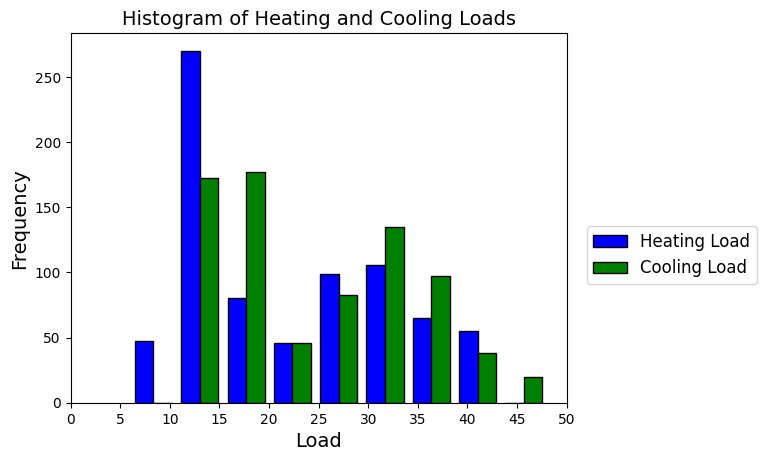

In [ ]:
plt.hist([energyData['heatingLoad'], energyData['coolingLoad']], bins=9, color=['blue', 'green'], label=['Heating Load', 'Cooling Load'],
         edgecolor = 'black')
plt.xlabel('Load', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.title('Histogram of Heating and Cooling Loads', fontsize = 14)
plt.legend(bbox_to_anchor=(1.4, 0.5), fontsize = 12)
plt.xticks(range(0, 51, 5))
plt.show()

#### **Plot 3: Bar Plot**

In this bar plot, you can see the surface area of different heating and cooling loads. The following features were included in the graph:

*   Use and change a legend position
*   Change a legend font size
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels

Both kinds of loads had higher surface areas with lower loads and lower surface areas with higher loads. Surface areas for cooling loads tended to be higher than surface areas for identical heating loads.

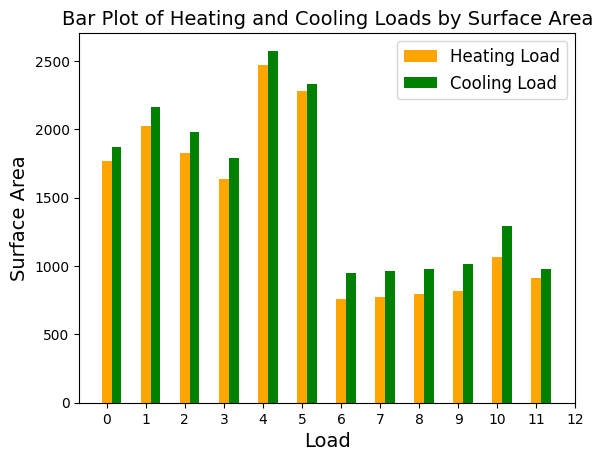

In [ ]:
categories = energyData['surfaceArea'].unique()
categories

valuesHeat = []
valuesCool = []

for category in categories:
    # Filter data for the current category
    heat = energyData.loc[energyData['surfaceArea'] == category, 'heatingLoad'].tolist()
    cool = energyData.loc[energyData['surfaceArea'] == category, 'coolingLoad'].tolist()

    # Append values to the lists
    valuesHeat.append(heat)
    valuesCool.append(cool)

#new_df = pd.DataFrame(columns=unique_values)
r1 = np.arange(len(categories))
r2 = [x + 0.25 for x in r1]

plt.bar(r1, [sum(x) for x in valuesHeat], color='orange', width=0.25, label='Heating Load')
plt.bar(r2, [sum(x) for x in valuesCool], color='green', width=0.25, label='Cooling Load')

plt.xlabel('Load', fontsize = 14)
plt.ylabel('Surface Area', fontsize = 14)
plt.title('Bar Plot of Heating and Cooling Loads by Surface Area', fontsize = 14)
plt.legend(loc='upper right', fontsize = 12)
plt.xticks(range(0, 13))
plt.show()

### **Part 2:**


#### **Plot 1: Scatter Plot**

In this scatter plot, you can see the heating loads for all relative compactness values. The features included in the graph:

*   Use and change a legend position
*   Change a legend font size
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Change size of axis Labels
*   Your own choice not included above (jitter to show the values more clearly)

The graph shows that lower compactness values tend to have less of a heating load than higher compactness values.

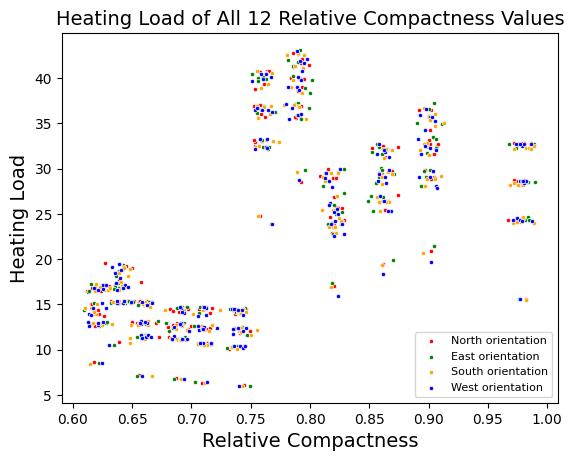

In [ ]:
import seaborn as sns
import numpy as np

unique_orientation = energyData['orientation'].unique()

color_map = {
    2: 'red',   # north
    3: 'green',  # east
    4: 'orange',    # south
    5: 'blue'  # west
}

for num in unique_orientation:
    x = energyData.loc[energyData['orientation'] == num, 'relativeCompactness']
    y = energyData.loc[energyData['orientation'] == num, 'heatingLoad']

    if num == 2:
        newNum = 'North'
    elif num == 3:
        newNum = 'East'
    elif num == 4:
        newNum = 'South'
    elif num == 5:
        newNum = 'West'

    if num in color_map:
        color = color_map[num]
        new_orientation = color
    else:
        color = 'black'
        new_orientation = 'unknown'

    jitter_amount = 0.005
    x_jittered = x + np.random.normal(loc=0, scale=jitter_amount, size=len(x))
    y_jittered = y + np.random.normal(loc=0, scale=jitter_amount, size=len(y))

    sns.scatterplot(x=x_jittered, y=y_jittered, label=f'{newNum} orientation', color=color, marker='.')

plt.xlabel('Relative Compactness', fontsize=14)
plt.ylabel('Heating Load', fontsize=14)
plt.title('Heating Load of All 12 Relative Compactness Values', fontsize=14)
plt.legend(loc='lower right', fontsize=8)

plt.show()


#### **Plot 2: Histogram**

In this histogram, you can see the frequency of heating and cooling loads. The difference this time is the bars overlap. It did not appear to be a feature with seaborn to show the bars side-by-side. The following features were included in the graph:

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels

The graph was right-skewed, especially for the heating load, and the cooling load was a bit more consistent than the heating load. The heating load of about 12 had the highest freqency of the heating loads and overall. The cooling loads of about 14 and 19 had the highest freqency for cooling loads.

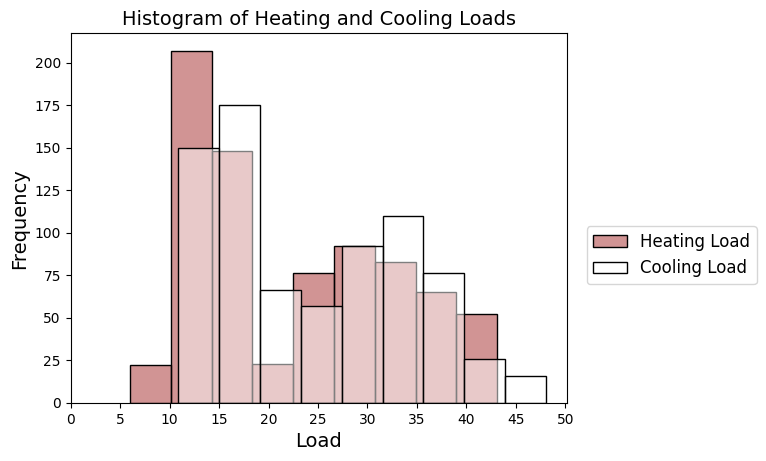

In [ ]:
sns.histplot(data=energyData, x='heatingLoad', color='brown', alpha=0.5, bins=9, label='Heating Load')
sns.histplot(data=energyData, x='coolingLoad', color='white', alpha=0.5, bins=9, label='Cooling Load')

plt.xlabel('Load', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.title('Histogram of Heating and Cooling Loads', fontsize = 14)
plt.xticks(range(0, 51, 5))
plt.legend(bbox_to_anchor=(1.4, 0.5), fontsize = 12)
plt.show()

#### **Plot 3: Bar Plot**

In this bar plot, you can see the surface area of different heating and cooling loads. This graphs is very similar to the graph made in the first section. The following features were included in the graph:

*   Use and change a legend position
*   Change a legend font size
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels

Both kinds of loads had higher surface areas with lower loads and lower surface areas with higher loads. Surface areas for cooling loads tended to be higher than surface areas for identical heating loads.

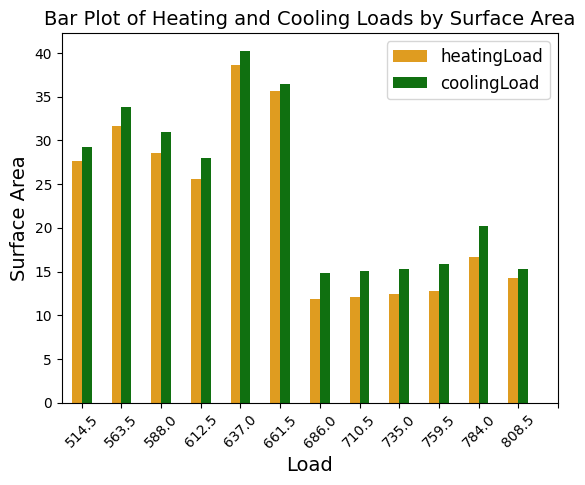

In [ ]:
melted_data = pd.melt(energyData, id_vars=['surfaceArea'], value_vars=['heatingLoad', 'coolingLoad'], var_name='Load Type', value_name='Load')
sns.barplot(data=melted_data, x='surfaceArea', y='Load', hue='Load Type', palette={'heatingLoad': 'orange', 'coolingLoad': 'green'}, errorbar = None, width = 0.5)

plt.xlabel('Load', fontsize = 14)
plt.ylabel('Surface Area', fontsize = 14)
plt.title('Bar Plot of Heating and Cooling Loads by Surface Area', fontsize = 14)
plt.legend(loc='upper right', fontsize = 12)
plt.xticks(range(0, 13),rotation=45)
plt.show()

### **Part 3: Differences between matplotlib and seaborn**

In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.

Differences:

* They use different function names for different graphs. A scatter plot is created with scatter() in matplotlib and scatterplot() in seaborn. A histogram is created with hist() in matplotlib and histplot() in seaborn. A bar plot is created with bar() in matplotlib and barplot() in seaborn.
* The parameters are slightly different for the different graphs. For example, the seaborn bar plot required the parameter 'palette' instead of matplotlib's parameter 'color' when specifying the color of the bars.
* Seaborn builds on matplotlib. You use both libraries when using seaborn.
* Seaborn automatically creates a confidence interval on the bar plot where matplotlib does not. If a confidence interval is not needed, it must be specified as 'errorbar = None' in the barplot() command for seaborn.
* The data points of the scatterplot seemed bigger with matplotlib than seaborn.
* The histogram graphs were the most different. It was unclear how to place the bars next to each other for different categories.

Similarities:

* Both create graphs that look nearly identical.
* Both were highly customizable in terms of creating graphs.
* Both are python libraries used for visualization of data.


# Conclusions  

* Lower compactness values tended to have less of a heating load than higher compactness values.
* The heating and cooling loads varied by building, but the heating load appeared to have more drastic differences in their values compared to the cooling load.
* Both kinds of loads had higher surface areas with lower loads and lower surface areas with higher loads. Surface areas for cooling loads tended to be higher than surface areas for identical heating loads.